In [1]:
import pandas as pd
df_mrd=pd.read_csv('labeledTrainData.tsv',sep='\t')

In [2]:
# Convert all text to lowercase letters.
df_mrd['review'] = df_mrd['review'].str.lower()
df_mrd.head()

,id,sentiment,review
0,5814_8,1,with all this stuff going down at the moment w...
1,2381_9,1,"\the classic war of the worlds\"" by timothy hi..."
2,7759_3,0,the film starts with a manager (nicholas bell)...
3,3630_4,0,it must be assumed that those who praised this...
4,9495_8,1,superbly trashy and wondrously unpretentious 8...


In [3]:
# Remove punctuation and special characters from the text.
import unicodedata
import sys

punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
if unicodedata.category(chr(i)).startswith('P'))
# For each string, remove any punctuation characters
df_mrd['review'] = df_mrd['review'].apply(lambda x: x.translate(punctuation))
df_mrd.head()

,id,sentiment,review
0,5814_8,1,with all this stuff going down at the moment w...
1,2381_9,1,the classic war of the worlds by timothy hines...
2,7759_3,0,the film starts with a manager nicholas bell g...
3,3630_4,0,it must be assumed that those who praised this...
4,9495_8,1,superbly trashy and wondrously unpretentious 8...


In [4]:
# Remove stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df_mrd['review_1'] = df_mrd['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_mrd.head()

,id,sentiment,review,review_1
0,5814_8,1,with all this stuff going down at the moment w...,stuff going moment mj ive started listening mu...
1,2381_9,1,the classic war of the worlds by timothy hines...,classic war worlds timothy hines entertaining ...
2,7759_3,0,the film starts with a manager nicholas bell g...,film starts manager nicholas bell giving welco...
3,3630_4,0,it must be assumed that those who praised this...,must assumed praised film greatest filmed oper...
4,9495_8,1,superbly trashy and wondrously unpretentious 8...,superbly trashy wondrously unpretentious 80s e...


In [5]:
# Apply porter stemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
# Tokenize
df_mrd['review_2'] = df_mrd['review_1'].apply(lambda x: word_tokenize(x))
# Stem
df_mrd['review_3'] = df_mrd['review_2'].apply(lambda x : [ps.stem(y) for y in x])
# Merge
df_mrd['review_4'] = df_mrd['review_3'].apply(lambda x : ' '.join(x))

In [6]:
df_final=df_mrd[['id','review_4','sentiment']]
df_final.head()

,id,review_4,sentiment
0,5814_8,stuff go moment mj ive start listen music watc...,1
1,2381_9,classic war world timothi hine entertain film ...,1
2,7759_3,film start manag nichola bell give welcom inve...,0
3,3630_4,must assum prais film greatest film opera ever...,0
4,9495_8,superbl trashi wondrous unpretenti 80 exploit ...,1


In [7]:
# Divide the data set into train and test in 80:20 ratio
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df_final, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 20000
No. of testing examples: 5000


In [8]:
# Fit and apply tf idf vectorization on train data
from sklearn.feature_extraction.text import TfidfVectorizer
# Create the tf-idf feature matrix
tfidf = TfidfVectorizer(max_features=20000)
feature_matrix_train = tfidf.fit_transform(training_data['review_4'])
feature_matrix_train
target_train= training_data['sentiment']

In [210]:
tfidf.vocabulary_

{'saw': 15281,
 'movi': 11835,
 'festiv': 6446,
 'spring': 16711,
 '2004': 177,
 'surpris': 17294,
 'german': 7313,
 'product': 13867,
 'stylish': 17112,
 'imagin': 8902,
 'shocker': 15884,
 'one': 12602,
 'scariest': 15318,
 'flic': 6675,
 'seen': 15542,
 'warn': 19300,
 'joke': 9627,
 'terror': 17673,
 'big': 1967,
 'cast': 3043,
 'good': 7545,
 'actor': 481,
 'martel': 11076,
 'european': 5989,
 'guru': 7881,
 'strong': 17062,
 'presenc': 13768,
 'excel': 6058,
 'direct': 4936,
 'nice': 12219,
 'design': 4763,
 'soundtrack': 16543,
 'lot': 10632,
 'heavi': 8264,
 'gore': 7580,
 'sfx': 15722,
 'like': 10435,
 'italian': 9410,
 'horror': 8648,
 'eighti': 5593,
 'flesh': 6667,
 'rip': 14801,
 'clean': 3505,
 'blood': 2134,
 'run': 15030,
 'red': 14402,
 'savag': 15269,
 'heart': 8239,
 'grip': 7753,
 'give': 7415,
 'dark': 4465,
 'dream': 5308,
 'mustse': 11958,
 'reunion': 14679,
 'team': 17566,
 'great': 7694,
 'episod': 5878,
 'justic': 9730,
 'hesit': 8379,
 'resolut': 14633,
 'cla

In [9]:
# Apply tf idf vectorization on test data
feature_matrix_test = tfidf.transform(testing_data['review_4'])
feature_matrix_test

<5000x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 467354 stored elements in Compressed Sparse Row format>

In [10]:
# Import the logistic regression model from sklearn 
from sklearn.linear_model import LogisticRegression

# Define the model
model = LogisticRegression(random_state=0)
# Train model
model.fit(feature_matrix_train, target_train)

LogisticRegression(random_state=0)

In [11]:
result = model.predict(feature_matrix_test)
output = pd.DataFrame( data={"id":testing_data["id"],"review":testing_data["review_4"], "sentiment":result} )
print(output)

            id                                             review  sentiment
23700   1436_3  oh dear best talent british tv made serial ass...          0
10863   3341_7  saw movi thursday night realli bore day expect...          1
9226    6632_7  cours invent everyth cinematographi film direc...          0
12689   7236_8  film avail david shepard kino hollywood fort l...          1
23045   7859_7  origin 1914 version tess storm countri also st...          1
...        ...                                                ...        ...
23992   3574_1  simpli could finish movi tune would say nomin ...          0
90      4784_2  beauti attract excel idea ruin bad select acto...          0
17436     18_3  art film either made 1969 1972 nation film pre...          0
2511    4772_3  watch film could alreadi tell complet copi saw...          0
14674  5185_10  watch movi well 100200 time love everi time wa...          1

[5000 rows x 3 columns]


In [12]:
# View predicted probabilities
model.predict_proba(feature_matrix_test)

array([[0.56484145, 0.43515855],
       [0.12514912, 0.87485088],
       [0.61522099, 0.38477901],
       ...,
       [0.62658059, 0.37341941],
       [0.97300793, 0.02699207],
       [0.05485183, 0.94514817]])

In [13]:
# Predict values for training target vector
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_score(testing_data['sentiment'], output['sentiment'])

0.8874

In [14]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_logistic = confusion_matrix(testing_data['sentiment'], output['sentiment'], labels=[1,0])
confusion_matrix_logistic

array([[2271,  252],
       [ 311, 2166]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix Logistic Regression')

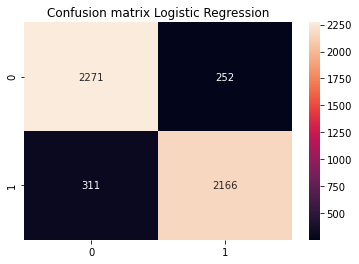

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 

# plot the confusion matrix
ax = plt.axes()
sns.heatmap(confusion_matrix_logistic, annot=True, fmt="d")
ax.set_title('Confusion matrix Logistic Regression')

In [16]:
# Calculate Precision
from sklearn.model_selection import cross_val_score

cross_val_score(model, feature_matrix_test, output['sentiment'], scoring="precision")

array([0.87878788, 0.91263941, 0.8954955 , 0.90659341, 0.90163934])

In [17]:
# Calculate recall
cross_val_score(model, feature_matrix_test, output['sentiment'], scoring="recall")

array([0.95542636, 0.95155039, 0.96317829, 0.95744681, 0.95744681])

In [18]:
# Calculate F1 score
cross_val_score(model, feature_matrix_test, output['sentiment'], scoring="f1")

array([0.91550604, 0.9316888 , 0.92810458, 0.93132643, 0.92870544])

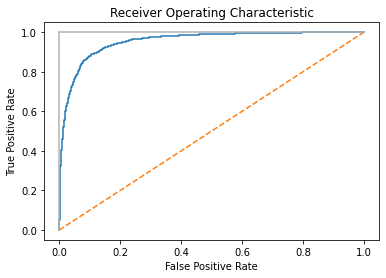

In [19]:
# Load libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Get Predicted probabilities
target_probabilities = model.predict_proba(feature_matrix_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(testing_data['sentiment'],target_probabilities)

# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [22]:
# Apply Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 500 trees
forest = RandomForestClassifier(n_estimators = 500, max_depth = None, min_samples_split=2, min_samples_leaf =1,
                                bootstrap = True, random_state=0)

# Train the model
forest = forest.fit(feature_matrix_train, target_train)

In [24]:
# Predict results for test rows
y_pred_forest  = forest.predict(feature_matrix_test)
output_forest = pd.DataFrame( data={"id":testing_data["id"],"review":testing_data["review_4"], "sentiment":y_pred_forest} )
print(output_forest.head())

           id                                             review  sentiment
23700  1436_3  oh dear best talent british tv made serial ass...          1
10863  3341_7  saw movi thursday night realli bore day expect...          1
9226   6632_7  cours invent everyth cinematographi film direc...          0
12689  7236_8  film avail david shepard kino hollywood fort l...          1
23045  7859_7  origin 1914 version tess storm countri also st...          1


In [26]:
# Predict values for training target vector
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_score(testing_data['sentiment'], output_forest['sentiment'])

0.8618

In [27]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix_forest = confusion_matrix(testing_data['sentiment'], output_forest['sentiment'], labels=[1,0])
confusion_matrix_forest

array([[2178,  345],
       [ 346, 2131]], dtype=int64)

In [28]:
# Calculate Precision
from sklearn.model_selection import cross_val_score

cross_val_score(forest, feature_matrix_test, output_forest['sentiment'], scoring="precision")

array([0.9244898 , 0.94280079, 0.932     , 0.94421488, 0.92929293])

In [29]:
# Calculate recall
cross_val_score(forest, feature_matrix_test, output_forest['sentiment'], scoring="recall")

array([0.8970297 , 0.94653465, 0.92277228, 0.9049505 , 0.91269841])

In [30]:
# Calculate F1 score
cross_val_score(forest, feature_matrix_test, output_forest['sentiment'], scoring="f1")

array([0.91055276, 0.94466403, 0.92736318, 0.92416582, 0.92092092])

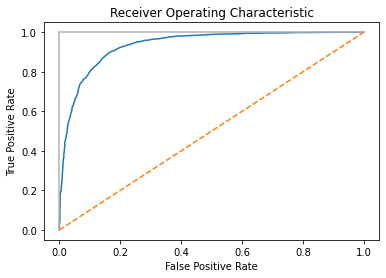

In [31]:
# Load libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Get Predicted probabilities
target_probabilities_forest = forest.predict_proba(feature_matrix_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(testing_data['sentiment'],target_probabilities_forest)

# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()